In [228]:
#from google.colab import drive
#drive.mount('/content/drive')

In [229]:
import pandas as pd
import numpy as np

In [230]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [231]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [232]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [233]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [234]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=10:
        a.append(i)

In [235]:
df = df.drop(a)

In [236]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
254448,1958,1,19,17.5,7.2,40,-0.2,meghalaya,west khasi hills,6,10,8,9,10,6,14,10
254449,1958,2,82,17.0,8.4,69,2.3,meghalaya,west khasi hills,6,10,8,9,10,6,14,10
254450,1958,3,30,22.9,11.7,64,-2.0,meghalaya,west khasi hills,6,10,8,9,10,6,14,10
254451,1958,4,611,24.3,15.3,111,-1.8,meghalaya,west khasi hills,6,10,8,9,10,6,14,10
254452,1958,5,592,23.7,16.8,109,-1.6,meghalaya,west khasi hills,6,10,8,9,10,6,14,10


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 254448 to 406967
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            1488 non-null   int64  
 1   Month           1488 non-null   int64  
 2   ppt(mm)         1488 non-null   int64  
 3   tmax(degC)      1488 non-null   float64
 4   tmin(degC)      1488 non-null   float64
 5   aet(mm)         1488 non-null   int64  
 6   PDSI(unitless)  1488 non-null   float64
 7   state           1488 non-null   object 
 8   district        1488 non-null   object 
 9   cluster14       1488 non-null   int64  
 10  cluster15       1488 non-null   int64  
 11  cluster18       1488 non-null   int64  
 12  cluster20       1488 non-null   int64  
 13  cluster25       1488 non-null   int64  
 14  cluster27       1488 non-null   int64  
 15  cluster30       1488 non-null   int64  
 16  cluster35       1488 non-null   int64  
dtypes: float64(3), int64(12), 

In [238]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(1488, 8)

In [239]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [240]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
254448,1958,1,19,17.5,7.2,40,-0.2,west khasi hills,1-1958
254449,1958,2,82,17.0,8.4,69,2.3,west khasi hills,2-1958
254450,1958,3,30,22.9,11.7,64,-2.0,west khasi hills,3-1958
254451,1958,4,611,24.3,15.3,111,-1.8,west khasi hills,4-1958
254452,1958,5,592,23.7,16.8,109,-1.6,west khasi hills,5-1958


In [241]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [242]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
254448,1958,1,19,17.5,7.2,40,-0.2,west khasi hills,1958-01-01,1
254449,1958,2,82,17.0,8.4,69,2.3,west khasi hills,1958-02-01,1
254450,1958,3,30,22.9,11.7,64,-2.0,west khasi hills,1958-03-01,1
254451,1958,4,611,24.3,15.3,111,-1.8,west khasi hills,1958-04-01,1
254452,1958,5,592,23.7,16.8,109,-1.6,west khasi hills,1958-05-01,1


In [243]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
254448,1958,1,19,40,-0.2,west khasi hills,1958-01-01,1,12.35
254449,1958,2,82,69,2.3,west khasi hills,1958-02-01,1,12.70
254450,1958,3,30,64,-2.0,west khasi hills,1958-03-01,1,17.30
254451,1958,4,611,111,-1.8,west khasi hills,1958-04-01,1,19.80
254452,1958,5,592,109,-1.6,west khasi hills,1958-05-01,1,20.25


In [244]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
406963,2019,8,733,113,-1.0,east khasi hills,2019-08-01,1,23.75
406964,2019,9,857,85,-0.9,east khasi hills,2019-09-01,1,21.90
406965,2019,10,473,80,0.8,east khasi hills,2019-10-01,1,19.90
406966,2019,11,58,61,1.1,east khasi hills,2019-11-01,1,17.65
406967,2019,12,11,41,1.0,east khasi hills,2019-12-01,1,12.65


In [245]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,ppt(mm),y,aet(mm),district
0,1981-01-01,48,11.15,52,west khasi hills
1,1981-02-01,34,13.15,48,west khasi hills
2,1981-03-01,124,16.00,100,west khasi hills
3,1981-04-01,940,17.55,97,west khasi hills
4,1981-05-01,563,19.50,113,west khasi hills


In [246]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
255180,2019,1,10,37,-2.2,west khasi hills,2019-01-01,1,12.00
255181,2019,2,66,63,2.2,west khasi hills,2019-02-01,1,13.25
255182,2019,3,91,91,1.3,west khasi hills,2019-03-01,1,16.00
255183,2019,4,329,106,1.1,west khasi hills,2019-04-01,1,18.75
255184,2019,5,665,118,1.0,west khasi hills,2019-05-01,1,20.65
255185,2019,6,870,110,0.9,west khasi hills,2019-06-01,1,22.05
255186,2019,7,1897,101,0.8,west khasi hills,2019-07-01,1,21.95
255187,2019,8,1084,108,0.7,west khasi hills,2019-08-01,1,23.25
255188,2019,9,897,83,0.7,west khasi hills,2019-09-01,1,21.65
255189,2019,10,499,80,2.0,west khasi hills,2019-10-01,1,19.60


In [247]:
from fbprophet import Prophet

In [248]:

model = Prophet()

In [249]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [250]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [251]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
907,2018-08-01,755,22.45,107,east khasi hills
908,2018-09-01,442,21.40,97,east khasi hills
909,2018-10-01,113,18.20,87,east khasi hills
910,2018-11-01,6,15.05,44,east khasi hills
911,2018-12-01,31,12.75,43,east khasi hills


In [252]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [253]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [254]:

forecast = model.predict(fut)

In [255]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,17.444678,19.743726,21.444589,17.441316,17.448112,3.147389,3.147389,3.147389,3.147389,3.147389,3.147389,0.0,0.0,0.0,20.592067
465,2019-09-30,17.438022,18.438852,20.157952,17.433701,17.442771,1.850559,1.850559,1.850559,1.850559,1.850559,1.850559,0.0,0.0,0.0,19.288582
466,2019-10-31,17.431145,15.426565,17.037983,17.425227,17.437041,-1.187168,-1.187168,-1.187168,-1.187168,-1.187168,-1.187168,0.0,0.0,0.0,16.243977
467,2019-11-30,17.424490,11.542665,13.246182,17.416728,17.431502,-5.032218,-5.032218,-5.032218,-5.032218,-5.032218,-5.032218,0.0,0.0,0.0,12.392272
468,2019-12-31,17.417613,9.505973,11.213145,17.408150,17.426003,-7.056467,-7.056467,-7.056467,-7.056467,-7.056467,-7.056467,0.0,0.0,0.0,10.361146


In [256]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,20.592067,19.743726,21.444589
465,2019-09-30,19.288582,18.438852,20.157952
466,2019-10-31,16.243977,15.426565,17.037983
467,2019-11-30,12.392272,11.542665,13.246182
468,2019-12-31,10.361146,9.505973,11.213145


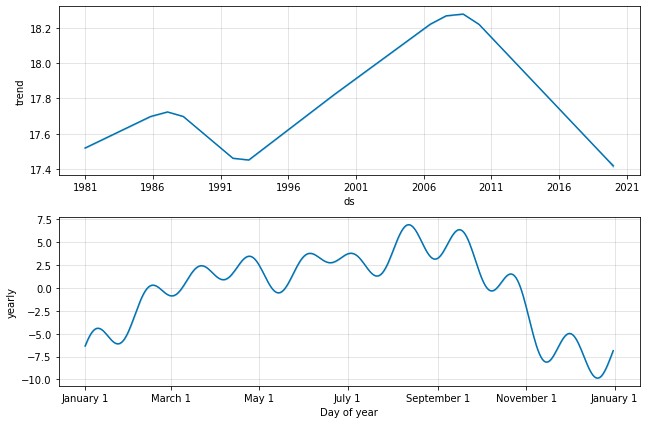

In [257]:
fig2 = model.plot_components(forecast)

In [258]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

(12, 1) (24, 1)
6.747204471409457


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mid_temp,Month,yhat
0,12.00,1,12.598258
1,12.20,1,12.598258
2,13.25,2,16.699666
3,13.75,2,16.699666
4,16.00,3,19.017098
5,16.90,3,19.017098
6,18.75,4,20.317630
7,19.70,4,20.317630
8,20.65,5,20.681782
9,21.15,5,20.681782


In [259]:
import matplotlib.pyplot as plt

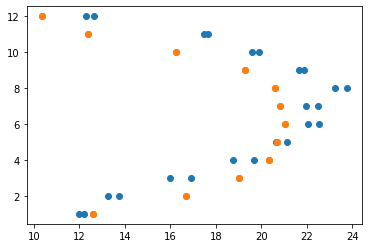

In [260]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [261]:
import pickle

In [262]:
filename = 'Cluster 15 - 10.sav'
pickle.dump(model, open(filename, 'wb'))

In [263]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [264]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,17.518789,10.328062,11.998285,17.518789,17.518789,-6.343946,-6.343946,-6.343946,-6.343946,-6.343946,-6.343946,0.0,0.0,0.0,11.174843
1,1981-02-01,17.521929,12.327290,14.041333,17.521929,17.521929,-4.347356,-4.347356,-4.347356,-4.347356,-4.347356,-4.347356,0.0,0.0,0.0,13.174573
2,1981-03-01,17.524765,15.864601,17.599218,17.524765,17.524765,-0.861144,-0.861144,-0.861144,-0.861144,-0.861144,-0.861144,0.0,0.0,0.0,16.663620
3,1981-04-01,17.527904,17.988739,19.640052,17.527904,17.527904,1.314857,1.314857,1.314857,1.314857,1.314857,1.314857,0.0,0.0,0.0,18.842761
4,1981-05-01,17.530942,19.170659,20.824868,17.530942,17.530942,2.474431,2.474431,2.474431,2.474431,2.474431,2.474431,0.0,0.0,0.0,20.005373
